**Aula Prática:** Coleta de dados

##### Primeiro passo: Coletar os dados

Os dados foram obtidos pela plataforma [Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset).

Este conjunto de dados contém informações sobre funcionários de uma empresa, incluindo: Formação acadêmica, Histórico de trabalho, Dados demográficos, Fatores relacionados ao emprego.

Com essa base é possível analisar fatores que influenciam a rotatividade de funcionários.

Objetivo: **Classificação (predição) se um funcionário se mantém ou não no trabalho**

In [1]:
import pandas as pd

# Lendo o arquivo CSV principal
df = pd.read_csv("../dados/dados_origem.csv")

# Visualizando as primeiras linhas
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Com base na descrição fornecida pelo autor, vou renomear as colunas para facilitar o entendimento.

1. Education: Formação acadêmica do funcionário
2. Joining Year: Ano em que o funcionário entrou na empresa (tempo de serviço)
3. City: Cidade onde o funcionário está alocado/trabalha
4. Payment Tier: Nível salarial do funcionário
5. Age: Idade do funcionário
6. Gender: Gênero do funcionário
7. Ever Benched: Indica se o funcionário já ficou sem tarefas atribuídas ("encostado")
8. Experience in Current Domain: Anos de experiência no campo de atuação atual
9. Leave or Not (Target): Indica se o funcionário deixou a empresa (1 = Sim, 0 = Não)

In [2]:
# Dicionário de mapeamento (inglês para português simplificado)
mapeamento_colunas = {
    'Education': 'Formacao_Academica',
    'JoiningYear': 'Ano_Admissao',
    'City': 'Cidade',
    'PaymentTier': 'Nivel_Salarial',
    'Age': 'Idade',
    'Gender': 'Genero',
    'EverBenched': 'Ficou_Sem_Tarefas',
    'ExperienceInCurrentDomain': 'Experiencia_Area',
    'LeaveOrNot': 'Deixou_Empresa'
}

# Renomear as colunas
df = df.rename(columns=mapeamento_colunas)

# Verificar o resultado
df.head()

,Formacao_Academica,Ano_Admissao,Cidade,Nivel_Salarial,Idade,Genero,Ficou_Sem_Tarefas,Experiencia_Area,Deixou_Empresa
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Agora 1 variável será removidas do estudo:
- Cidade pois faremos uma análise mais simples sem considerar a cidade que o funcionário vive

In [3]:
# REMOVER Cidade
df = df.drop(columns=['Cidade'])

# Verificar o resultado
df.head()

,Formacao_Academica,Ano_Admissao,Nivel_Salarial,Idade,Genero,Ficou_Sem_Tarefas,Experiencia_Area,Deixou_Empresa
0,Bachelors,2017,3,34,Male,No,0,0
1,Bachelors,2013,1,28,Female,No,3,1
2,Bachelors,2014,3,38,Female,No,2,0
3,Masters,2016,3,27,Male,No,5,1
4,Masters,2017,3,24,Male,Yes,2,1


##### Segundo passo: Fazer algumas análises

Existe dados faltantes na minha base de dados?

In [4]:
dados_faltantes = df.isna().sum()

# Mostrar o resultado
print("Dados faltantes por coluna:")
print(dados_faltantes)

Dados faltantes por coluna:
Formacao_Academica    0
Ano_Admissao          0
Nivel_Salarial        0
Idade                 0
Genero                0
Ficou_Sem_Tarefas     0
Experiencia_Area      0
Deixou_Empresa        0
dtype: int64


In [5]:
# Também podemos verificar o tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Formacao_Academica  4653 non-null   object
 1   Ano_Admissao        4653 non-null   int64 
 2   Nivel_Salarial      4653 non-null   int64 
 3   Idade               4653 non-null   int64 
 4   Genero              4653 non-null   object
 5   Ficou_Sem_Tarefas   4653 non-null   object
 6   Experiencia_Area    4653 non-null   int64 
 7   Deixou_Empresa      4653 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 290.9+ KB


Quaal a quantidade de funcionários que deixou a empresa (variável resposta)?

In [6]:
df['Deixou_Empresa'].value_counts()

Deixou_Empresa
0    3053
1    1600
Name: count, dtype: int64

Qual a distribuição de funcionários por formação acadêmica?

In [7]:
df['Formacao_Academica'].value_counts()

Formacao_Academica
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [8]:
df['Genero'].value_counts()

Genero
Male      2778
Female    1875
Name: count, dtype: int64

In [9]:
df['Nivel_Salarial'].value_counts()

Nivel_Salarial
3    3492
2     918
1     243
Name: count, dtype: int64

In [10]:
df['Experiencia_Area'].value_counts()

Experiencia_Area
2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: count, dtype: int64

Qual a  média de idade por formação acadêmica?

In [11]:
# Calcular a média de idade por formação
media_idade = df.groupby('Deixou_Empresa')['Idade'].mean().reset_index()

# Formatando a saída (opcional)
media_idade.columns = ['Formação Acadêmica', 'Idade']
print(media_idade)

   Formação Acadêmica      Idade
0                   0  29.571896
1                   1  29.052500


Se quiser gerar uma análise gráfica dessas informações:

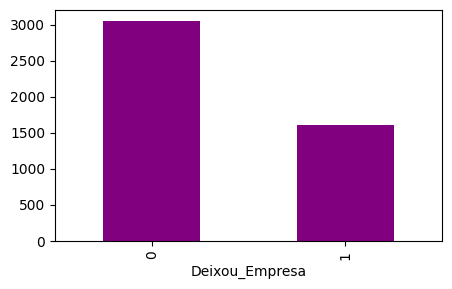

In [14]:
# Importar biblioteca de visualização de dados
import matplotlib.pyplot as plt

# Contar a quantidade de funcionários por situação (deixou a empresa)
contagem_funcionario = df['Deixou_Empresa'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(5, 3))
contagem_funcionario.plot(kind='bar', color='purple')
plt.show()

**Muito Importante**! Algumas variáveis são do tipo "object". Precisaremos fazer uma transformação para a representação numérica antes de executar uma técnica de Aprendizado de Máquina

In [17]:
# Importar método de transformar automaticamento
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Formacao_Academica'] = encoder.fit_transform(df['Formacao_Academica'])

#Exemplo de como recuperar o mapeamento feito pelo método LabelEncoder()
mapeamento_formacao = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento para 'Formação Academica':", mapeamento_formacao)

Mapeamento para 'Formação Academica': {'Bachelors': np.int64(0), 'Masters': np.int64(1), 'PHD': np.int64(2)}


In [18]:
df['Genero'] = encoder.fit_transform(df['Genero'])

In [19]:
df['Ficou_Sem_Tarefas'] = encoder.fit_transform(df['Ficou_Sem_Tarefas'])

In [20]:
df.head()

,Formacao_Academica,Ano_Admissao,Nivel_Salarial,Idade,Genero,Ficou_Sem_Tarefas,Experiencia_Area,Deixou_Empresa
0,0,2017,3,34,1,0,0,0
1,0,2013,1,28,0,0,3,1
2,0,2014,3,38,0,0,2,0
3,1,2016,3,27,1,0,5,1
4,1,2017,3,24,1,1,2,1


In [21]:
# Verificar se todas as variáveis são numéricas
df.dtypes

Formacao_Academica    int64
Ano_Admissao          int64
Nivel_Salarial        int64
Idade                 int64
Genero                int64
Ficou_Sem_Tarefas     int64
Experiencia_Area      int64
Deixou_Empresa        int64
dtype: object

Agora vamos salvar a nossa base de dados limpa:

In [22]:
#Salvar o DataFrame transformado em um arquivo CSV

caminho_arquivo = '../dados/dados_transformados.csv'
df.to_csv(caminho_arquivo, index=False, encoding='utf-8-sig')

print(f"DataFrame salvo com sucesso em: {caminho_arquivo}")

DataFrame salvo com sucesso em: ../dados/dados_transformados.csv
